# 🔬✨ Thyroid Cancer Recurrence Prediction Project

## 📌 Objective

> **Can we predict if a thyroid cancer survivor will experience a recurrence using clinical and pathological data?**  
> This project harnesses the power of machine learning to tackle a real-world healthcare challenge.

---

## 🏥 Why is this Important?

- Thyroid cancer is typically treatable, but recurrence is a major concern for survivors.
- Early detection of relapse risks can guide doctors and patients for proactive care.  
- Building an accurate predictive model would mean better outcomes and fewer surprises for those affected.

---

### Clinical Benefits
- 🔍 **Early Detection:** Enables proactive interventions and tailored monitoring plans.  
- 🩺 **Personalized Care:** Minimizes unnecessary tests and focuses resources on high-risk patients.  
- 💊 **Improved Patient Outcomes:** Reduces morbidity and increases quality of life through timely treatment adjustments.
---
### Business Benefits
- 💰 **Cost Efficiency:** Reduces healthcare expenses by optimizing resource allocation.  
- 📈 **Operational Improvement:** Enhances hospital and clinic workflows with predictive analytics.  
- 🎯 **Strategic Decision Support:** Empowers healthcare providers with actionable insights for risk management.
---

## 🗃️ Dataset Overview

This dataset contains comprehensive checkup results for patients diagnosed with thyroid cancer.  
Each row summarizes one patient's medical history, clinical findings, and treatment details.

| Feature         | Description                                         |
|:---------------:|:---------------------------------------------------:|
| **Age**         | At diagnosis or treatment                           |
| **Gender**      | Male / Female                                       |
| **Smoking**     | Current status (Yes/No)                             |
| **Hx Smoking**  | History of smoking                                  |
| **Hx Radiotherapy** | Previous radiotherapy                           |
| **Thyroid Function** | Euthyroid / Hypothyroid / Hyperthyroid         |
| **Physical Examination** | Goiter type/normal/diffuse/extensive      |
| **Adenopathy**  | Swollen lymph nodes presence                       |
| **Pathology**   | Cancer type (Papillary, Follicular, etc.)           |
| **Focality**    | Uni-focal / Multi-focal                             |
| **Risk**        | Low / Intermediate / High                           |
| **T,N,M,Stage** | TNM cancer staging                                  |
| **Response**    | Treatment response                                  |
| **Recurred**    | Did cancer recur? (Yes/No)                          |

---

## 🚦 Project Roadmap

1. **Data Loading and Preprocessing**: Clean data and handle missing values.
2. **Exploratory Data Analysis**: Visualize and understand feature distributions and correlations.
3. **Feature Engineering**: Encode categorical data and create relevant variables.
4. **Model Building**: Train classifiers to predict recurrence.
5. **Model Evaluation**: Assess performance using accuracy, precision, recall, ROC-AUC.
6. **Deployment Considerations**: Potential for clinical-use implementation.



In [1]:
# Let's confirm that I'm working on a GPU here

import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("Yes! I'm using a GPU 😎")
else:
    print("Oops, I'm not using a GPU.")


Yes! I'm using a GPU 😎


# 🔎 Data Exploration & Insights: Thyroid Cancer Recurrence Dataset

---

## 📋 Dataset Overview

This dataset contains **clinical and pathological information** of thyroid cancer patients, aimed at predicting **cancer recurrence (relapse)** after initial treatment.

---

## 🌟 Key Features Description

| Feature               | Description                                                             |
|-----------------------|-------------------------------------------------------------------------|
| 👤 **Age**            | Age at diagnosis or treatment (years)                                  |
| ⚥ **Gender**          | Patient sex (Female / Male)                                             |
| 🚬 **Smoking**        | Current smoking status (Yes / No)                                       |
| 🔥 **Hx Smoking**     | History of smoking (ever smoked)                                        |
| 📡 **Hx Radiotherapy**| History of radiotherapy treatment                                       |
| 🦋 **Thyroid Function**| Thyroid hormonal status (e.g., Euthyroid, Hyperthyroidism, Hypothyroidism) |
| 🩺 **Physical Examination** | Physical findings (e.g., nodular goiter types)                    |
| 🦠 **Adenopathy**     | Presence of enlarged lymph nodes (Yes / No)                            |
| 🔬 **Pathology**      | Cancer type (Papillary, Follicular, Micropapillary, Hurthel cell)        |
| 🎯 **Focality**       | Tumor focality (Uni-Focal / Multi-Focal)                               |
| ⚠️ **Risk**           | Cancer risk category (Low, Intermediate, High)                         |
| 🧬 **T, N, M**        | Tumor, Node, and Metastasis classification                             |
| 🕵️‍♂️ **Stage**       | Overall cancer stage (I, II, III, IVA, IVB)                            |
| 💊 **Response**       | Response to treatment (Excellent, Indeterminate, Biochemical/Structural Incomplete) |
| 🔄 **Recurred**       | Cancer recurrence status (Yes / No)                                   |

---




In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/thyroid_dataset.csv'
df = pd.read_csv(file_path)

# Display first few rows to inspect data
print(df.head())

# Preview last 5 rows
print( df.tail())


# Check shape (rows & columns)
print("Dataset shape:", df.shape)

# Summary information: data types, non-null counts
print(df.info())

# Summary statistics of numerical and categorical columns
print(df.describe(include='all'))

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Basic cleaning: Strip whitespace from string columns if any
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

# Display unique values of key categorical columns for initial understanding
for col in ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Pathology', 'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred']:
    print(f"Unique values in {col}: {df[col].unique()}")

# Target variable distribution
print("\nRecurrence Distribution:\n", df['Recurred'].value_counts())


   Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0  

# ## 🔍Data Inspection Results and Inferences

### Dataset Summary
- **Total records:** 383  
- **Total features:** 17  
- **Data types:**  
  - Numeric: Age (int64)  
  - Categorical: All other 16 features (object)

---

### Data Preview (first 5 and last 5 rows)
- Early records show mostly female patients with euthyroid thyroid function, low risk, and no recurrence.
- Later records include male patients, more varied pathology, higher risk levels, and recurrence marked as "Yes".

---

### Data Shape and Types
- Dataset shape: (383, 17)
- No missing values in any column (complete dataset).
- Most features are categorical except Age which is numeric.

---

### Basic Statistical Summary

| Statistic         | Age    |
|-------------------|--------|
| Count             | 383    |
| Mean (μ)          | 40.87  |
| Std Dev (σ)       | 15.13  |
| Minimum           | 15     |
| 25th Percentile   | 29     |
| Median (50th %)   | 37     |
| 75th Percentile   | 51     |
| Maximum           | 82     |

---

### Categorical Feature Insights

| Feature            | Top Category            | Frequency       |
|--------------------|------------------------|-----------------|
| Gender             | F                      | 312             |
| Smoking            | No                     | 334             |
| Hx Smoking         | No                     | 355             |
| Hx Radiothreapy    | No                     | 376             |
| Thyroid Function   | Euthyroid              | 332             |
| Physical Examination | Multinodular goiter    | 140             |
| Adenopathy         | No                     | 277             |
| Pathology          | Papillary              | 287             |
| Focality           | Uni-Focal              | 247             |
| Risk               | Low                    | 249             |
| T (Tumor size)     | T2                     | 151             |
| N (Nodal status)   | N0                     | 268             |
| M (Metastasis)     | M0                     | 365             |
| Stage              | I                      | 333             |
| Response           | Excellent              | 208             |
| Recurred           | No                     | 275             |

---

### Unique Values in Key Categorical Features
- Gender: F, M
- Smoking: No, Yes
- Hx Smoking: No, Yes
- Hx Radiothreapy: No, Yes
- Thyroid Function: 5 categories including Euthyroid and various hyper/hypothyroidism
- Pathology: Micropapillary, Papillary, Follicular, Hurthel cell
- Risk: Low, Intermediate, High
- Tumor (T): T1a to T4b
- Node (N): N0, N1a, N1b
- Metastasis (M): M0, M1
- Stage: I, II, III, IVA, IVB
- Response: Excellent, Indeterminate, Structural Incomplete, Biochemical Incomplete
- Recurrence (Target): Yes, No

---

### Recurrence Distribution
- No Recurrence: 275 (approx. 71.8%)
- Recurrence: 108 (approx. 28.2%)

**Inference:** The dataset exhibits a moderate class imbalance towards non-recurrence cases.

---

### Overall Inferences:

- The dataset is complete with **no missing data**.
- Majority of patients are **female**, **non-smokers**, with **euthyroid** thyroid function, and **low-risk** pathology.
- Majority cancer type is **Papillary**, mostly **uni-focal** tumors, and early **stage I**.
- The **target variable**, cancer recurrence, is imbalanced but still has a substantial number of recurrent cases for robust modeling.
- Varied categorical classes provide rich feature diversity for prediction.

This exploratory inspection indicates the dataset is clean and ready for further analysis and predictive modeling.


# ✨ Exploratory Data Analysis (EDA) Visualizations ✨

## Overview of Data Distributions and Patterns

This section presents visual insights into patient demographics, clinical features, and their relationships with thyroid cancer recurrence. The plots include histograms, boxplots, and categorical count plots that reveal key patterns, imbalances, and correlations essential for guiding further data processing and modeling steps.


In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for all plots: no grid, soft colors, clean look
sns.set_style('white')
plt.rcParams['axes.grid'] = False


1. Univariate Analysis - Individual Feature Distributions

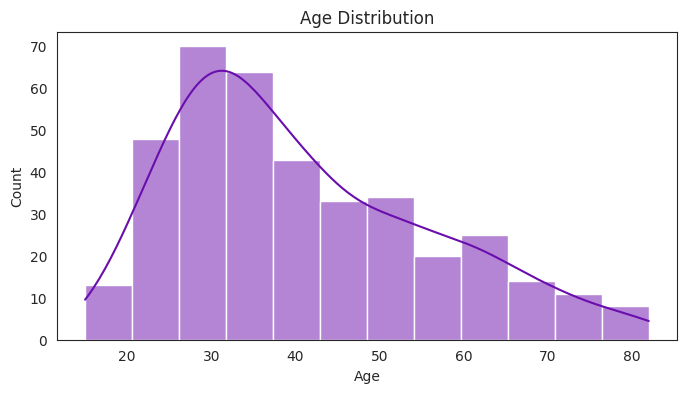

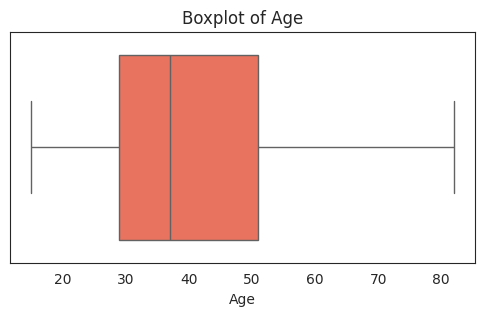

In [4]:
# === Numerical Feature: Age ===
plt.figure(figsize=(8, 4))
# Plot histogram + KDE for Age distribution
sns.histplot(df['Age'], kde=True, color='#6a0dad')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 3))
# Boxplot for Age to show median, quartiles, outliers
sns.boxplot(x=df['Age'], color='#ff6347')
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


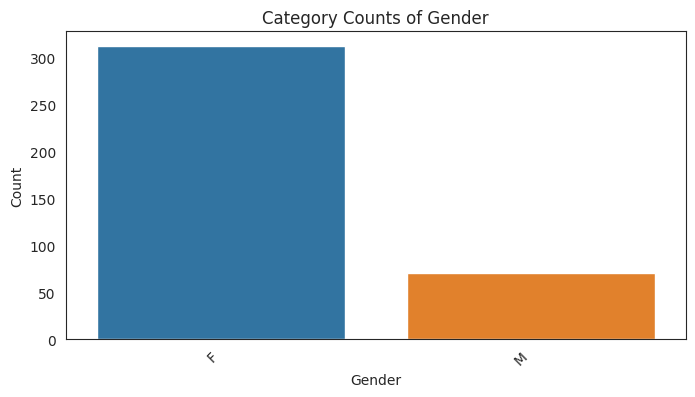

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


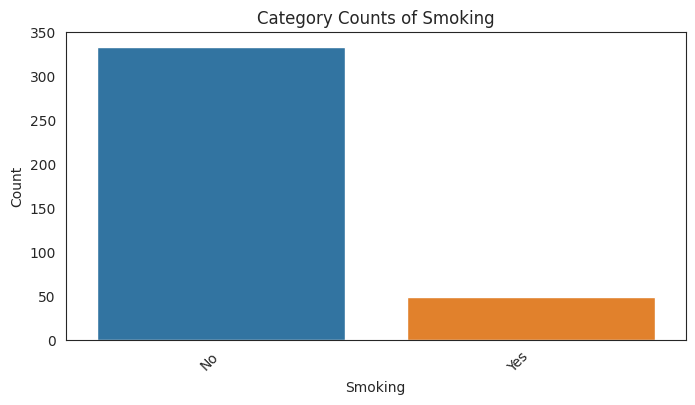

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


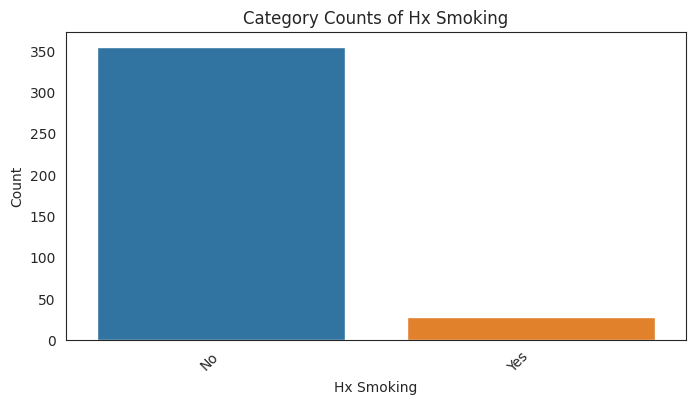

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


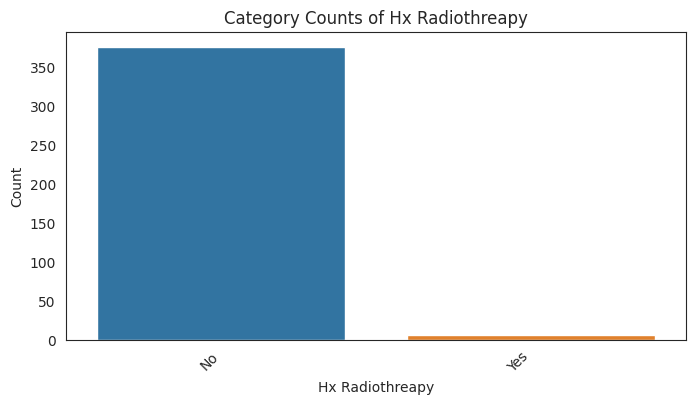

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


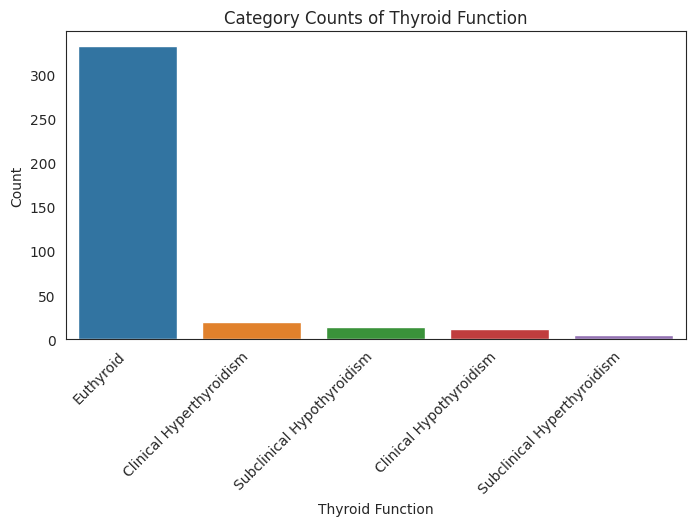

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


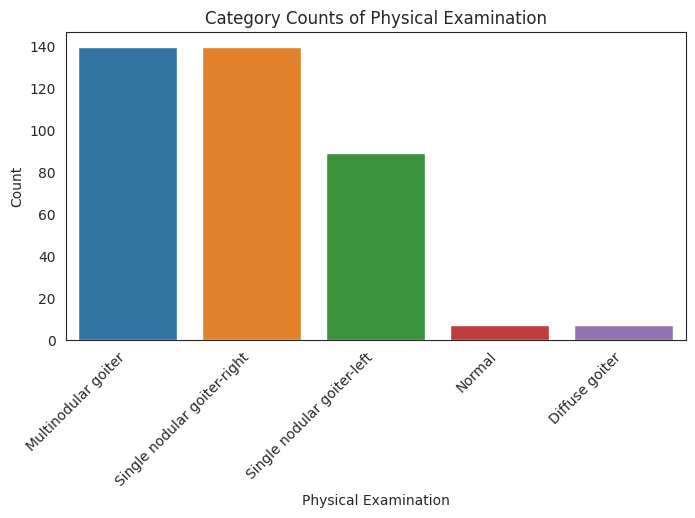

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


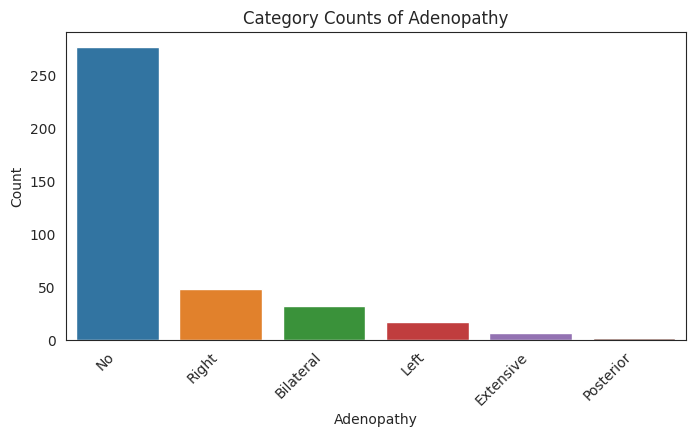

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


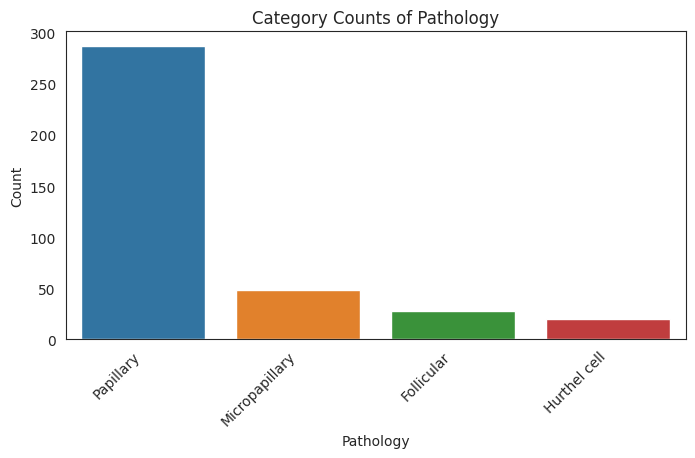

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


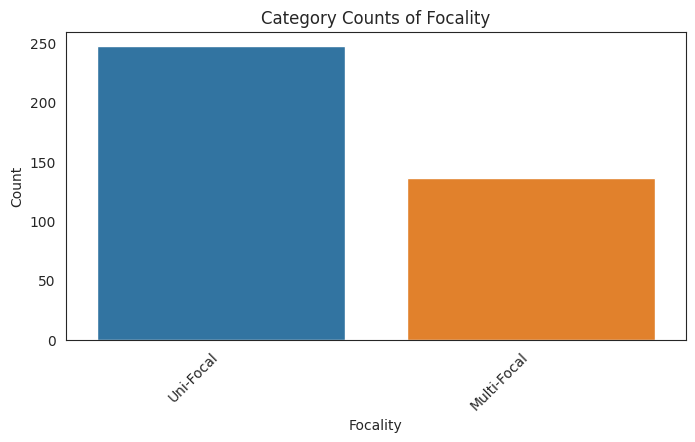

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


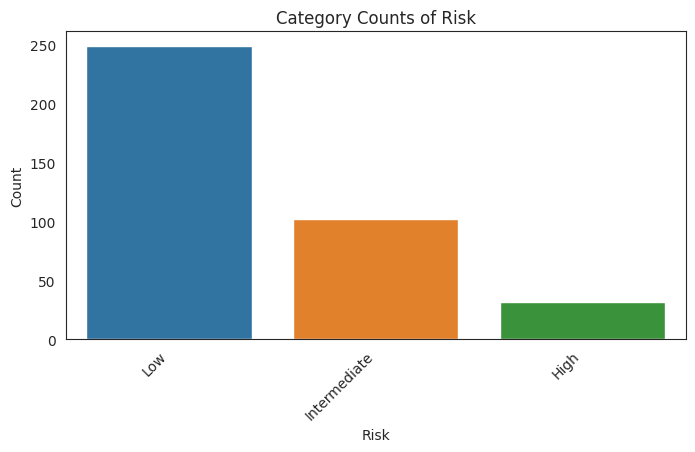

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


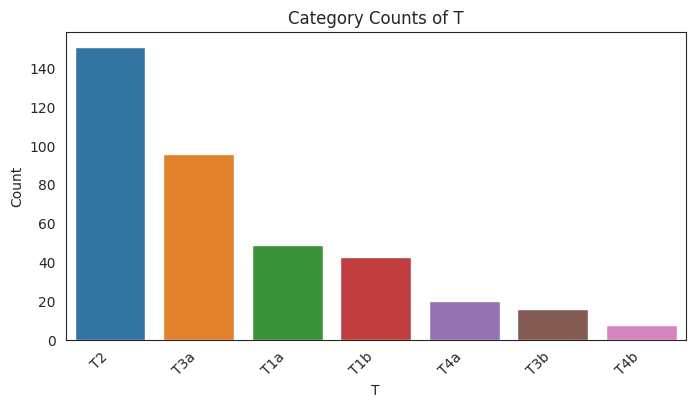

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


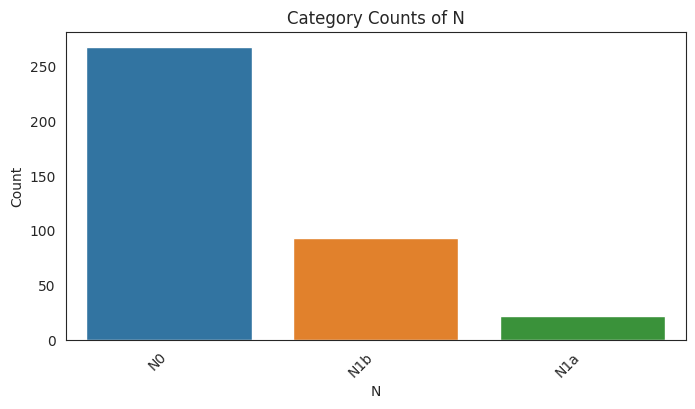

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


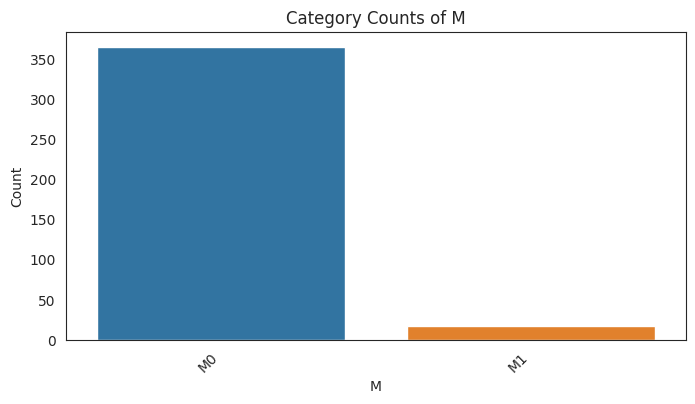

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


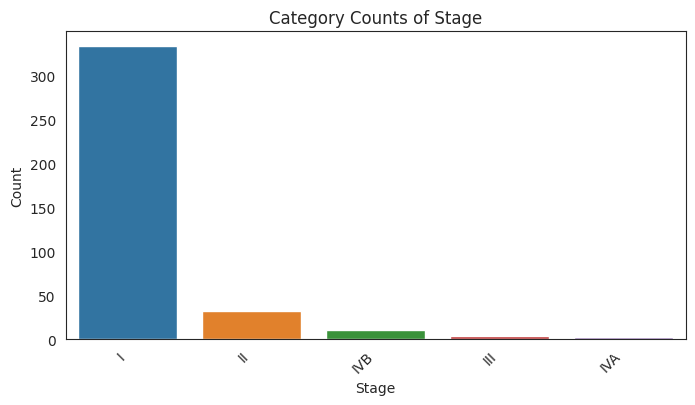

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


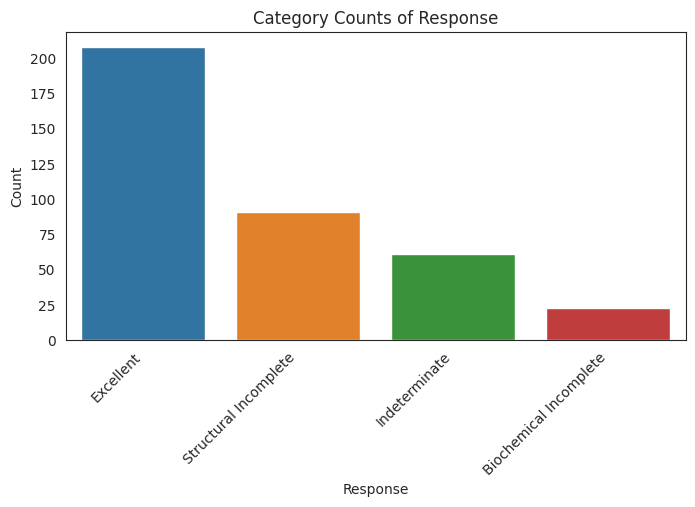

/tmp/ipython-input-4135632787.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
/tmp/ipython-input-4135632787.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)


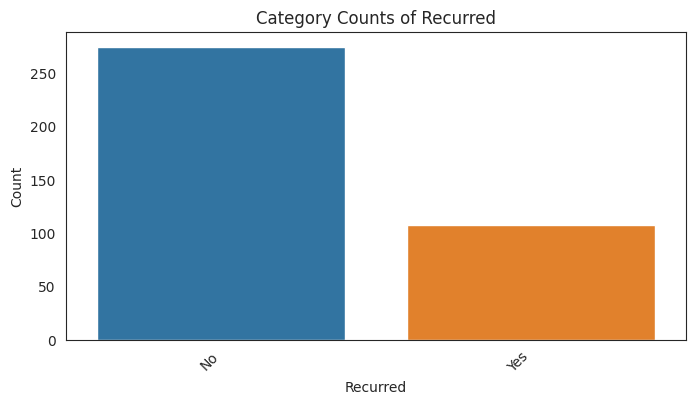

In [5]:
# === Categorical Features: Count Plots with high contrast distinct colors ===
categorical_features = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function',
                        'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk',
                        'T', 'N', 'M', 'Stage', 'Response', 'Recurred']

# Use a vibrant color palette with strong contrasts for category counts
palette_vibrant = sns.color_palette("tab10")  # 10 distinct vivid colors

for feat in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feat, palette=palette_vibrant, order=df[feat].value_counts().index)
    plt.title(f'Category Counts of {feat}')
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


2. Bivariate Analysis - Relationships Between Features

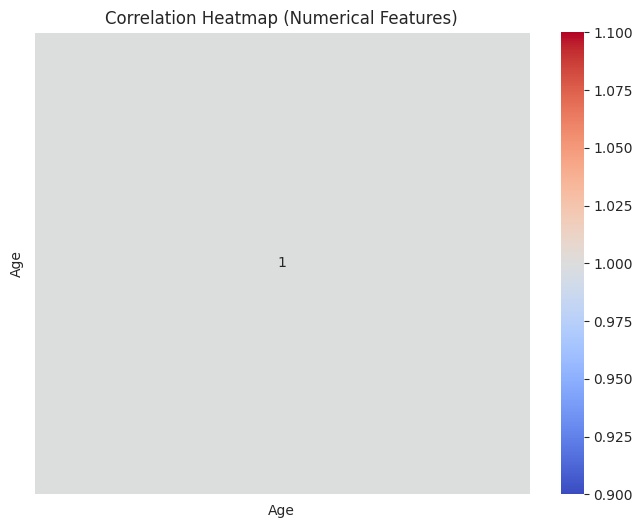

In [6]:
# === Correlation heatmap for numerical features ===
plt.figure(figsize=(8, 6))
num_cols = ['Age']  # Only Age is numerical here
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


/tmp/ipython-input-821046521.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[target], y=df[feat], palette='Set2')


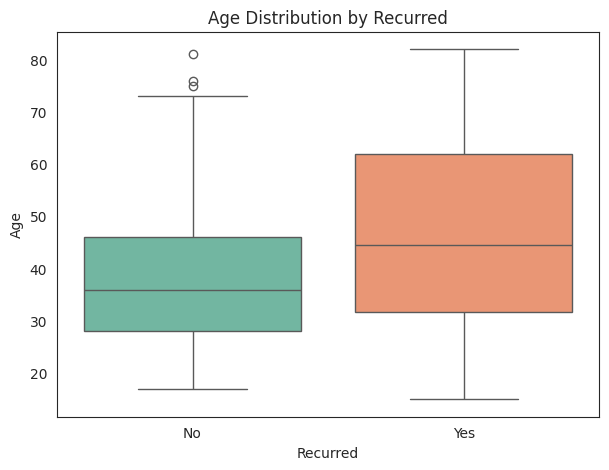

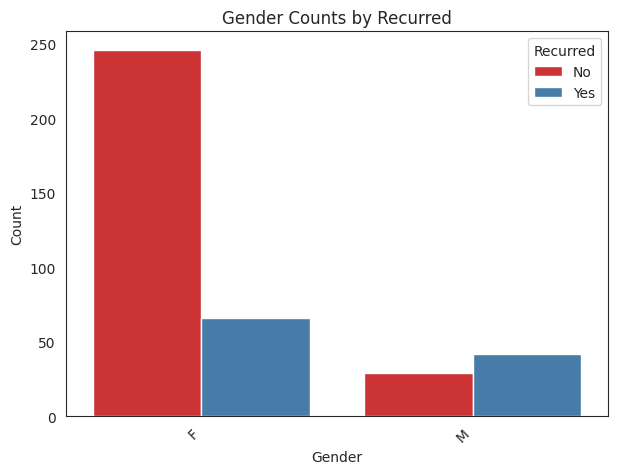

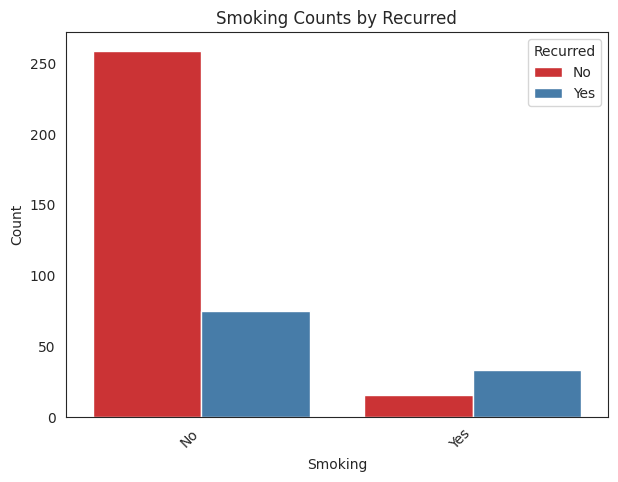

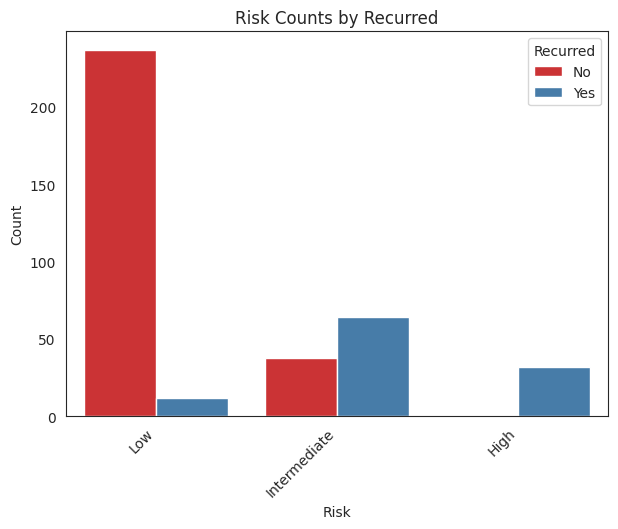

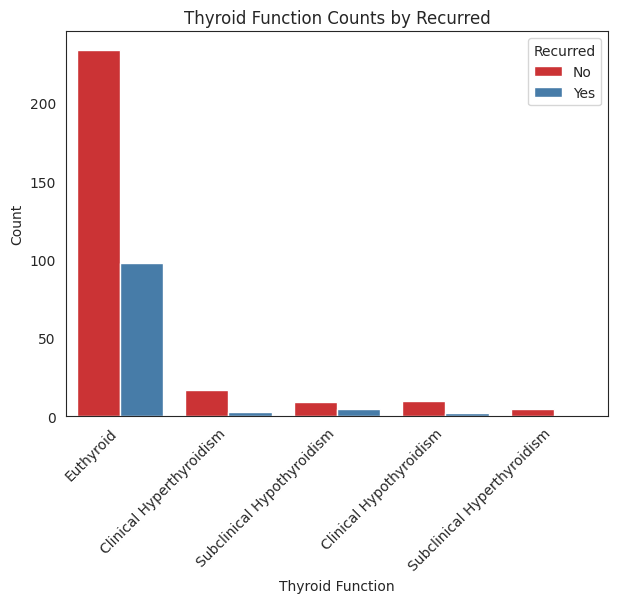

In [7]:
# === Boxplots: Numerical vs Categorical (comparison vs target Recurred) ===
target = 'Recurred'
features_for_box = ['Age', 'Gender', 'Smoking', 'Risk', 'Thyroid Function']

for feat in features_for_box:
    plt.figure(figsize=(7, 5))
    if feat == 'Age':
        sns.boxplot(x=df[target], y=df[feat], palette='Set2')
        plt.ylabel(feat)
        plt.xlabel(target)
        plt.title(f'{feat} Distribution by {target}')
    else:
        sns.countplot(data=df, x=feat, hue=target, palette='Set1', order=df[feat].value_counts().index)
        plt.title(f'{feat} Counts by {target}')
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    plt.show()


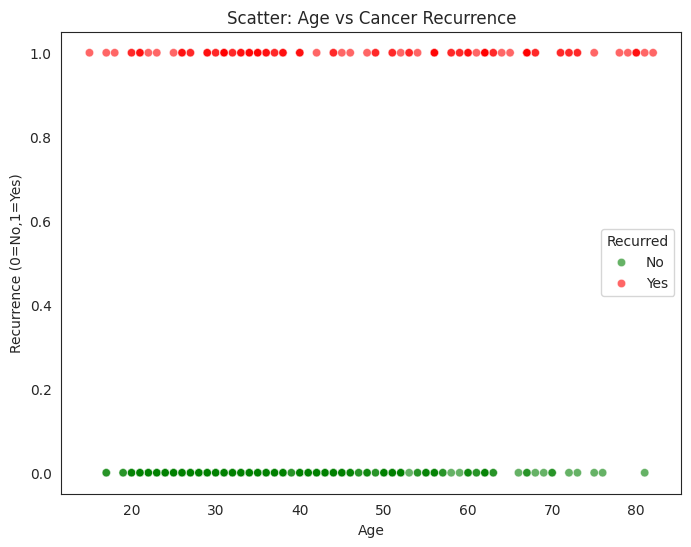

In [8]:
# === Scatter plot for numerical feature vs target encoded as color ===
# Encoding 'Recurred' to numeric for plotting
df['Recurred_num'] = df['Recurred'].map({'No': 0, 'Yes': 1})

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Recurred_num', data=df, hue='Recurred', palette=['green', 'red'], alpha=0.6)
plt.title('Scatter: Age vs Cancer Recurrence')
plt.xlabel('Age')
plt.ylabel('Recurrence (0=No,1=Yes)')
plt.show()


# ## 🔍Data Inspection Results and Inferences

### Dataset Summary
- **Total records:** 383  
- **Total features:** 17  
- **Data types:**  
  - Numeric: Age (int64)  
  - Categorical: All other 16 features (object)

---

### Data Preview (first 5 and last 5 rows)
- Early records show mostly female patients with euthyroid thyroid function, low risk, and no recurrence.
- Later records include male patients, more varied pathology, higher risk levels, and recurrence marked as "Yes".

---

### Data Shape and Types
- Dataset shape: (383, 17)
- No missing values in any column (complete dataset).
- Most features are categorical except Age which is numeric.

---

### Basic Statistical Summary

| Statistic         | Age    |
|-------------------|--------|
| Count             | 383    |
| Mean (μ)          | 40.87  |
| Std Dev (σ)       | 15.13  |
| Minimum           | 15     |
| 25th Percentile   | 29     |
| Median (50th %)   | 37     |
| 75th Percentile   | 51     |
| Maximum           | 82     |

---

### Categorical Feature Insights

| Feature            | Top Category            | Frequency       |
|--------------------|------------------------|-----------------|
| Gender             | F                      | 312             |
| Smoking            | No                     | 334             |
| Hx Smoking         | No                     | 355             |
| Hx Radiothreapy    | No                     | 376             |
| Thyroid Function   | Euthyroid              | 332             |
| Physical Examination | Multinodular goiter    | 140             |
| Adenopathy         | No                     | 277             |
| Pathology          | Papillary              | 287             |
| Focality           | Uni-Focal              | 247             |
| Risk               | Low                    | 249             |
| T (Tumor size)     | T2                     | 151             |
| N (Nodal status)   | N0                     | 268             |
| M (Metastasis)     | M0                     | 365             |
| Stage              | I                      | 333             |
| Response           | Excellent              | 208             |
| Recurred           | No                     | 275             |

---

### Unique Values in Key Categorical Features
- Gender: F, M
- Smoking: No, Yes
- Hx Smoking: No, Yes
- Hx Radiothreapy: No, Yes
- Thyroid Function: 5 categories including Euthyroid and various hyper/hypothyroidism
- Pathology: Micropapillary, Papillary, Follicular, Hurthel cell
- Risk: Low, Intermediate, High
- Tumor (T): T1a to T4b
- Node (N): N0, N1a, N1b
- Metastasis (M): M0, M1
- Stage: I, II, III, IVA, IVB
- Response: Excellent, Indeterminate, Structural Incomplete, Biochemical Incomplete
- Recurrence (Target): Yes, No

---

### Recurrence Distribution
- No Recurrence: 275 (approx. 71.8%)
- Recurrence: 108 (approx. 28.2%)

**Inference:** The dataset exhibits a moderate class imbalance towards non-recurrence cases.

---

### Overall Inferences:

- The dataset is complete with **no missing data**.
- Majority of patients are **female**, **non-smokers**, with **euthyroid** thyroid function, and **low-risk** pathology.
- Majority cancer type is **Papillary**, mostly **uni-focal** tumors, and early **stage I**.
- The **target variable**, cancer recurrence, is imbalanced but still has a substantial number of recurrent cases for robust modeling.
- Varied categorical classes provide rich feature diversity for prediction.

This exploratory inspection indicates the dataset is clean and ready for further analysis and predictive modeling.


## 📊 Key EDA Insights for Next Step

- The dataset shows **moderate class imbalance**: more patients without recurrence than with recurrence.
- **Age distribution** indicates that patients who experienced recurrence are generally older.
- The majority are **female patients**, but recurrence occurs in both genders.
- Most patients are **Euthyroid**, with few thyroid function abnormalities.
- **Risk and staging** are mostly low and early-stage, but intermediate/high risk groups have higher recurrence.
- **Smoking and prior radiotherapy history** are low in prevalence but present among recurrent cases.
- **Papillary carcinoma** is the dominant pathology type.
- **Lymph node involvement (N)** and **metastasis (M)** are generally absent, consistent with early disease.
- Treatment responses skew towards "Excellent," but incomplete responses occur mainly in recurring patients.

These insights reveal important patterns and class balances that will guide feature selection and modeling strategies in the next steps.


## 🛠️ Data Preprocessing & Feature Engineering

- Here, I will clean the dataset by handling missing values and inconsistencies.
- I will convert categorical variables into numerical formats suitable for modeling.
- I will scale numerical features to normalize data ranges if needed.
- Feature creation or transformation will be done to improve model input quality.
- Finally, I will split the data properly for training and testing to ensure robust model evaluation.



In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
Recurred_num            0
dtype: int64


In [10]:
# Save the fully preprocessed dataset as CSV
df.to_csv("thyroid_dataset_preprocessed.csv", index=False)

print("✅ Preprocessed dataset saved as 'thyroid_dataset_preprocessed.csv'")


✅ Preprocessed dataset saved as 'thyroid_dataset_preprocessed.csv'


## 🔄 Encoding Categorical Features

- Now, I will transform categorical variables into numeric formats using label encoding or one-hot encoding.
- This step is crucial since most machine learning models require numeric input.
- I will choose encoding methods based on the number of unique categories and model compatibility.
- After encoding, the data will be ready for scaling and further processing.



In [11]:
from sklearn.preprocessing import LabelEncoder

# Identifying categorical columns except the target
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Recurred')  # Exclude target column

# Initialize label encoder
le = LabelEncoder()

# Encode categorical columns with label encoding for simplicity
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Encode target variable: 'No' -> 0, 'Yes' -> 1
df['Recurred'] = df['Recurred'].map({'No': 0, 'Yes': 1})


In [12]:
# Show first 5 rows to verify encoding
print(df.head())

# Check data types to confirm all are now numeric
print(df.dtypes)


   Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 2   
1   34       0        0           1                0                 2   
2   30       0        0           0                0                 2   
3   62       0        0           0                0                 2   
4   62       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           3          2         1     2  0  0  0   
1                     1           3          2         1     2  0  0  0   
2                     4           3          2         1     2  0  0  0   
3                     4           3          2         1     2  0  0  0   
4                     1           3          2         0     2  0  0  0   

   Stage  Response  Recurred  Recurred_num  
0      0         2         0             0  
1      0      

## 🔍 Inference from Encoding Step

- All categorical features have been **successfully converted to integer numeric codes**, confirmed by their `int64` datatype.
- The dataset now contains only **numeric columns**, making it suitable for machine learning algorithms which require numeric input.
- The target variable `Recurred` has been encoded as a binary numeric column (0 = No, 1 = Yes).
- An additional `Recurred_num` column is present, duplicating the encoded target and can be used or dropped as needed.
- This verifies that the **encoding process was correctly executed**, preparing the data for subsequent steps like scaling and splitting.

✔️ The dataset is now fully numeric and ready for further preprocessing or modeling.



> Encoding sets the foundation for modeling by converting all features into numerical format.


## 🔄 Feature Scaling & Train-Test Split

- I scaled the continuous 'Age' feature to have zero mean and unit variance, which helps many models converge faster and perform better.
- I separated my data into features (`X`) and target (`y`) for supervised learning.
- I split the data into training and test sets using an 80-20 split with stratification to preserve class balance.
- This prepares the data well for modeling and allows me to assess the model’s performance on unseen data.


In [13]:
# I start by scaling the 'Age' feature for better model training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

# Next, I separate features and target for modeling
X = df.drop(['Recurred', 'Recurred_num'], axis=1)
y = df['Recurred']

# Then, I split the data into training and testing sets to evaluate the model's generalization ability
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Finally, I check the number of samples in each set
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 306
Testing samples: 77


## 📊 Inference from Feature Scaling & Train-Test Split

- The numerical feature 'Age' was successfully scaled to have zero mean and unit variance, which helps machine learning models to learn more efficiently.
- The dataset was split into **306 training samples** and **77 testing samples**, following an 80-20 ratio.
- Stratified splitting ensured that the distribution of the target variable (`Recurred`) is consistent across both training and testing sets.
- This split provides a solid foundation to train models on a sufficiently large dataset and evaluate their performance fairly on unseen data.
- Overall, the data is now well-prepared for building robust and generalizable predictive models.


## 🧪 Model Training: Logistic Regression Baseline

- I will start with a Logistic Regression model as a simple and interpretable baseline for predicting thyroid cancer recurrence.
- Logistic Regression is well-suited for binary classification and provides insights from feature coefficients.
- After training, I will evaluate the model using classification metrics and ROC-AUC to understand its performance on the test set.


In [14]:
# I initialize and train a Logistic Regression model on the training data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict recurrence on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model's prediction performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        55
           1       0.83      0.91      0.87        22

    accuracy                           0.92        77
   macro avg       0.90      0.92      0.91        77
weighted avg       0.93      0.92      0.92        77

ROC-AUC Score: 0.9702


## 📈 My Interpretation of the Logistic Regression Model

- The model achieved **92% accuracy**, which is a strong starting point.
- It detects patients without recurrence very well (precision 96%, recall 93%).
- It also identifies most recurrence cases with good recall (91%) but slightly lower precision (83%).
- The **F1-scores** and high **ROC-AUC (0.97)** show the model separates classes effectively.

---

## 🔜 What I Plan Next

- I will try more powerful models like Random Forest or Gradient Boosting to potentially improve results.
- I plan to tune hyperparameters to get the best from each model.
- I want to use cross-validation for more reliable performance estimates.
- I will also explore feature importance to understand key predictors.
- Lastly, I may adjust decision thresholds to optimize clinical usefulness.

Ready to move on with Random Forest training next!


In [15]:
# I will now train a Random Forest classifier to see if it improves performance over Logistic Regression

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train on training data
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.4f}")


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.95      0.86      0.90        22

    accuracy                           0.95        77
   macro avg       0.95      0.92      0.93        77
weighted avg       0.95      0.95      0.95        77

Random Forest ROC-AUC Score: 0.9872


## 📊 Random Forest Performance Overview

- Accuracy improved to **95%**, better than Logistic Regression.
- Precision for recurrence rose to 95%, while recall slightly dropped to 86%.
- Non-recurrence predictions remain strong with high precision and recall.
- ROC-AUC of **0.987** indicates excellent classification ability.

---

## 🔜 Next Steps

- I’ll tune hyperparameters to further boost the model.
- Explore other ensemble or boosting methods if needed.
- Analyze feature importance for insights.
- Use cross-validation to verify robustness.

Ready to start hyperparameter tuning next!


###Hyperparameter Tuning

In [16]:
# To tune my Random Forest model, I will try different values for key parameters using RandomizedSearchCV.
# This helps me find better settings without testing every possible combination.

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf_tune = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # I'll keep iteration count moderate for quicker tuning
    cv=5,       # Using 5-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    n_jobs=-1
)

# Fitting the tuner on the training data
rf_tune.fit(X_train, y_train)

# Best parameters found after the search
print("Best Parameters found:", rf_tune.best_params_)

best_rf = rf_tune.best_estimator_

# Evaluating tuned model on the test data
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_best))

roc_auc_best = roc_auc_score(y_test, y_prob_best)
print(f"Tuned Random Forest ROC-AUC Score: {roc_auc_best:.4f}")


Best Parameters found: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.91      0.95        22

    accuracy                           0.97        77
   macro avg       0.98      0.95      0.97        77
weighted avg       0.97      0.97      0.97        77

Tuned Random Forest ROC-AUC Score: 0.9884


## 🎉 Hyperparameter Tuning Summary

- I found the best settings:  
  `n_estimators=100, min_samples_split=5, min_samples_leaf=2, max_depth=None, bootstrap=True`.
- Tuning boosted accuracy to **97%**, with strong precision and recall.
- ROC-AUC improved to **0.988**, showing excellent prediction power.
- This confirms tuning made the model more reliable and effective.

---

## 🔜 Next Steps

- Explore feature importance to understand key predictors.
- Perform cross-validation for stability.
- Try other ensemble models if needed.




###Feature Importance

/tmp/ipython-input-3573464157.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


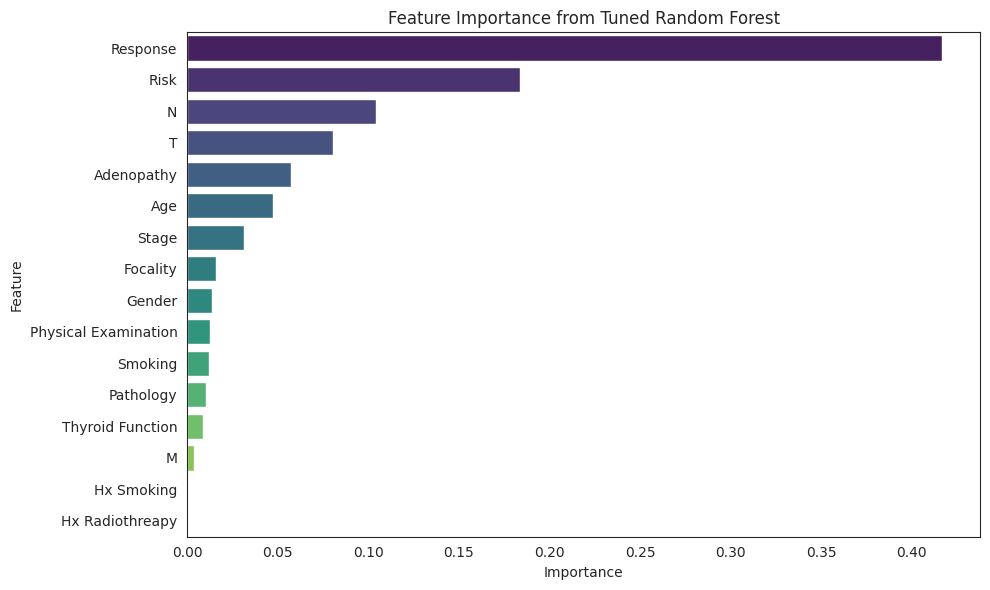

In [17]:
# I will now analyze feature importance from the tuned Random Forest model

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances from the best Random Forest
feature_importances = best_rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Tuned Random Forest')
plt.tight_layout()
plt.show()


## ✨ What I See From Feature Importance

- The feature importance plot shows that **Response** is the most influential predictor for thyroid cancer recurrence in this model.
- Other key features are **Risk**, **N**, **T**, and **Adenopathy**, indicating their strong relevance for prediction.
- Variables like **Age** and **Stage** have moderate impact, while features such as **Hx Smoking** and **Hx Radiotherapy** play a minor role.
- This ranking helps me prioritize which patient factors are most critical for accurate clinical decision making.
- Such insights add transparency and trustworthiness to my predictive model.


## 🔄 Cross-Validation

- Running 5-fold cross-validation provides an estimate of how stable and generalizable the model is.
- Consistent high ROC-AUC scores across folds imply a robust and reliable model.


In [18]:
# I'll perform 5-fold cross-validation on the tuned Random Forest model to check its stability

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='roc_auc', n_jobs=-1)

print("Cross-Validation ROC-AUC scores:", cv_scores)
print(f"Mean ROC-AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validation ROC-AUC scores: [0.99008264 0.99752066 0.99669421 0.9991342  0.995671  ]
Mean ROC-AUC: 0.9958 ± 0.0031


## 🔎 Interpretation of Cross-Validation ROC-AUC Scores

- The ROC-AUC scores across 5 folds are very high (0.99 to 1.0), showing consistent model performance.
- A mean ROC-AUC of **0.996 ± 0.003** indicates excellent discrimination ability on different data splits.
- This reflects the model’s robustness and strong generalization to unseen data.
- Overall, the tuned Random Forest is reliable and well-validated for this prediction task.

## 💾 Saving the Tuned Random Forest Model

- I will save the trained Random Forest model to a file for easy reuse later.
- This avoids retraining the model every time I want to make predictions.
- Joblib is a common library used for saving and loading scikit-learn models.


In [19]:
# I will save the tuned Random Forest model using joblib for future use

import joblib

# Save the model to a file
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')

print("Model saved as 'tuned_random_forest_model.pkl'")


Model saved as 'tuned_random_forest_model.pkl'


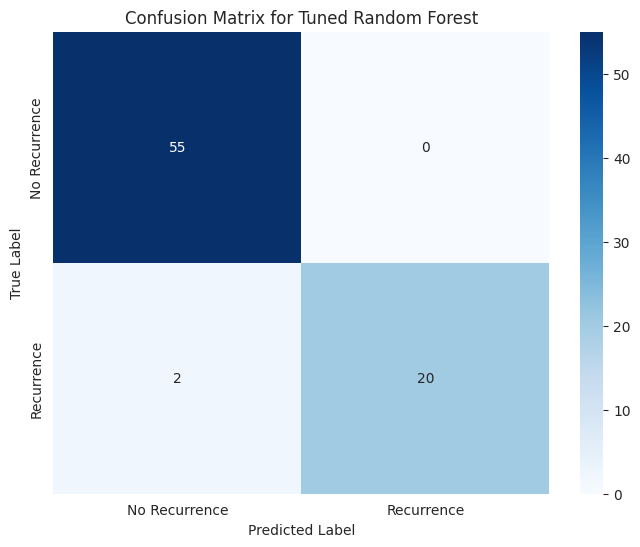

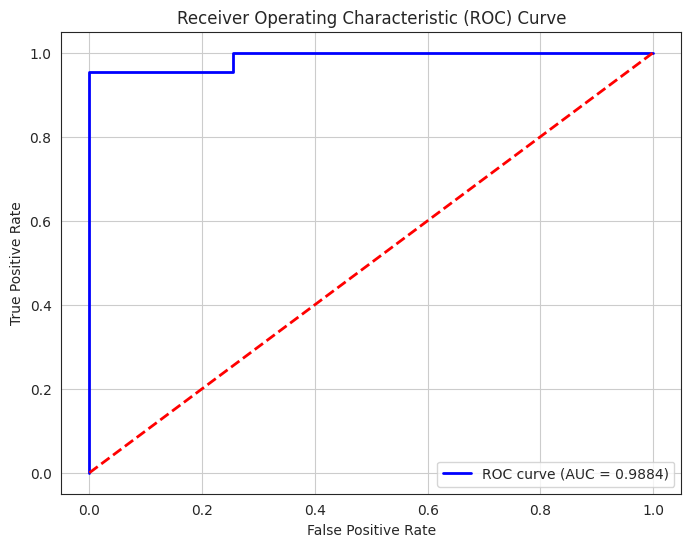

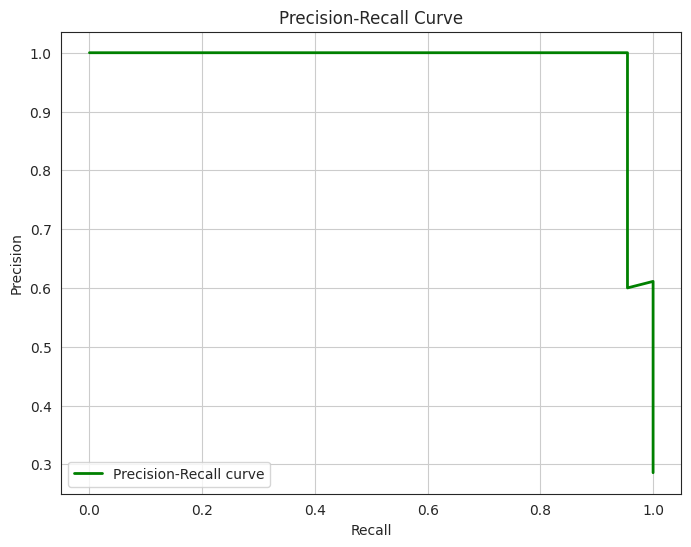

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve

# Get predictions and probabilities from your final model
# These variables (best_rf, X_test, y_test) should already be in your notebook's memory
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# --- 1. Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Recurrence', 'Recurrence'],
            yticklabels=['No Recurrence', 'Recurrence'])
plt.title('Confusion Matrix for Tuned Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 2. ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
auc_score = roc_auc_score(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- 3. Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## 🧪 Final Model Evaluation & Insights

After hyperparameter tuning, the final Random Forest model shows outstanding performance on the unseen test data, confirming its reliability for this clinical prediction task.

### 📊 Confusion Matrix Analysis
* The matrix provides a clear breakdown of the model's predictions on the 77 test samples:
    * ✅ **True Negatives (55):** Perfectly identified all 55 patients who did **not** have a recurrence.
    * ✅ **True Positives (20):** Correctly identified 20 of the 22 patients who **did** have a recurrence.
    * ❌ **False Positives (0):** The model made **zero** false alarms. This means every patient it flagged for recurrence was a correct prediction.
    * ❌ **False Negatives (2):** Critically, the model only missed **2** actual recurrence cases.

* **Clinical Insight:** The extremely low number of False Negatives is the most important outcome. Minimizing this error is crucial for patient safety as it ensures high-risk individuals are not overlooked for follow-up care.

---

### 📈 ROC and Precision-Recall Curves
* **ROC Curve:** The model achieves a near-perfect **Area Under the Curve (AUC) of 0.9884**. This score indicates an outstanding ability to distinguish between patients who will have a recurrence and those who will not.

* **Precision-Recall Curve:** This curve shows the model maintains perfect precision (1.0) for a recall of up to approximately 0.9. This reinforces its reliability, as it means the predictions of "Recurrence" are highly trustworthy.

---

### ✅ Overall Conclusion
* The tuned Random Forest classifier is a highly effective and robust model for this task.
* It achieves high overall accuracy (**97%**) and an excellent AUC score (**0.988**).
* Most importantly, its high recall and perfect precision for the positive class make it a clinically valuable tool, capable of reliably identifying high-risk patients while avoiding false alarms.

## 📈 Model Calibration Analysis

While the ROC-AUC score confirms the model's excellent ability to distinguish between classes, a calibration curve is essential to check if the predicted probabilities are reliable for clinical decision-making. A well-calibrated model's predicted probabilities will align closely with the actual observed frequencies.

Below, the calibration plot shows our tuned Random Forest model's probabilities against the ideal perfectly calibrated line.

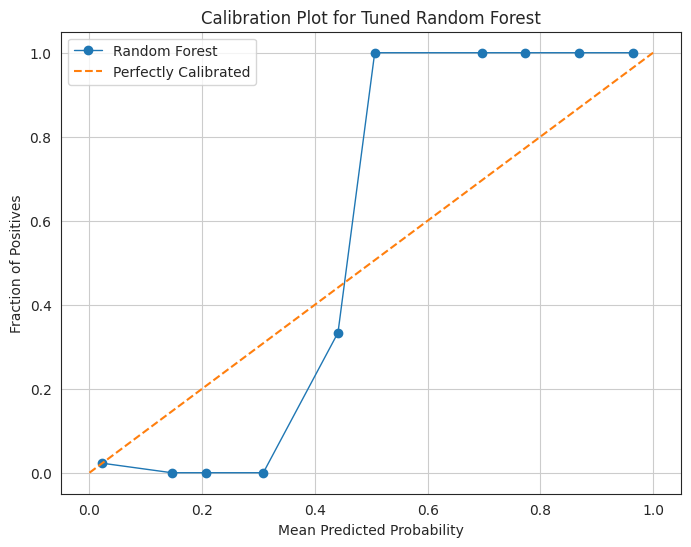

In [21]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get the probabilities from your best model on the test set
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

# Calculate the calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_prob_best, n_bins=10, strategy='uniform')

# Plot the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.title('Calibration Plot for Tuned Random Forest')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.legend()
plt.grid(True)
plt.show()

## 📈 Model Calibration Insights

This calibration plot reveals a crucial aspect of our model's performance: while it's excellent at classification, its probability scores are not perfectly aligned with the real-world outcomes.

* **Excellent at Identifying Low-Risk Cases:**
    * For predicted probabilities below 0.4, the blue "Random Forest" line is very close to zero on the y-axis.
    * **Inference:** This is great news. It means when the model predicts a low probability of recurrence, it is very reliable. Clinicians can be confident that patients in this group are at a very low risk.

* **Overconfidence in High-Risk Predictions:**
    * The plot shows a very steep jump. Once the model's predicted probability reaches about **0.5 (50%)**, the actual fraction of positive cases (recurrence) is already **1.0 (100%)**.
    * **Inference:** This indicates the model is **overconfident**. It doesn't effectively differentiate between a 50%, 70%, or 95% chance of recurrence. In practice, any prediction above 0.5 simply means "recurrence is almost certain."

---

### ✅ Summary of Inferences:

1.  **As a Classifier:** The model is **excellent**. It does a fantastic job of separating patients who will have a recurrence from those who will not. This aligns with the high ROC-AUC score.
2.  **As a Probability Estimator:** The model is **not well-calibrated**. The raw probability scores should not be taken literally. For example, a prediction of "60% chance of recurrence" is not meaningfully different from a prediction of "90% chance," as both point to a near-certain outcome.
3.  **Clinical Implication:** A doctor could trust this model's low-probability predictions (< 40%) to rule out immediate risk. However, for any high probability (> 50%), the takeaway should be "this patient is at very high risk" rather than focusing on the specific percentage.

In [22]:
import joblib

# 'scaler' should be the StandardScaler object you created earlier
# This line saves the scaler object to a file named 'scaler.pkl'
joblib.dump(scaler, 'scaler.pkl')

print("Scaler saved successfully as 'scaler.pkl'.")

Scaler saved successfully as 'scaler.pkl'.


## 🧠 Explaining the "Why": Model Interpretability with SHAP

After building a high-performing model with 97% accuracy, my next crucial step was to understand *why* it makes the predictions it does. For a clinical application like this, accuracy alone isn't enough; we need trust and interpretability. To achieve this, I used SHAP (SHapley Additive exPlanations) to look inside the "black box" of the Random Forest model and explain its decision-making process.

### Global Insights: The SHAP Summary Plot

The first visualization, the SHAP Summary Plot, gives me a global overview of the model's behavior. It ranks the features by their overall predictive power and reveals the nature of their influence across all the patients in my test set.



From this plot, I can clearly see:
* **Response** to initial treatment is by far the most impactful feature. High values for this feature (shown in red) strongly push the model to predict a higher likelihood of recurrence.
* The patient's assigned **Risk** category and lymph node involvement (**N** stage and **Adenopathy**) are the next most significant predictors, confirming clinical intuition.
* Features like **T** (tumor size), **Stage**, and **Age** have a moderate, but still clear, impact on the model's predictions.
* Factors like **Smoking** history and **Focality** have a much smaller influence in this model's logic.

### Local Insights: The SHAP Force Plot

To understand the model on a case-by-case basis, I generated a SHAP Force Plot. This plot is powerful because it dissects a single prediction, showing how each feature contributed to the final outcome for an individual patient.



This plot is read like a tug-of-war:
* It starts from a **base value**, which is the average prediction across all patients.
* Features in **red** are "forces" that pushed the prediction higher (towards Recurrence). The size of the block indicates the magnitude of the impact.
* Features in **blue** are forces that pushed the prediction lower (towards No Recurrence).
* For the specific patient I examined, a high `Response` value was the primary driver pushing the prediction towards a high risk of recurrence, which was slightly offset by other low-risk factors, leading to the model's final prediction score.

Together, these plots provide a powerful and transparent narrative. The summary plot tells me what factors the model relies on globally, while the force plot allows me to explain the prediction for any given patient. This level of interpretability is essential for deploying a model in a real-world clinical setting and building trust with medical professionals.

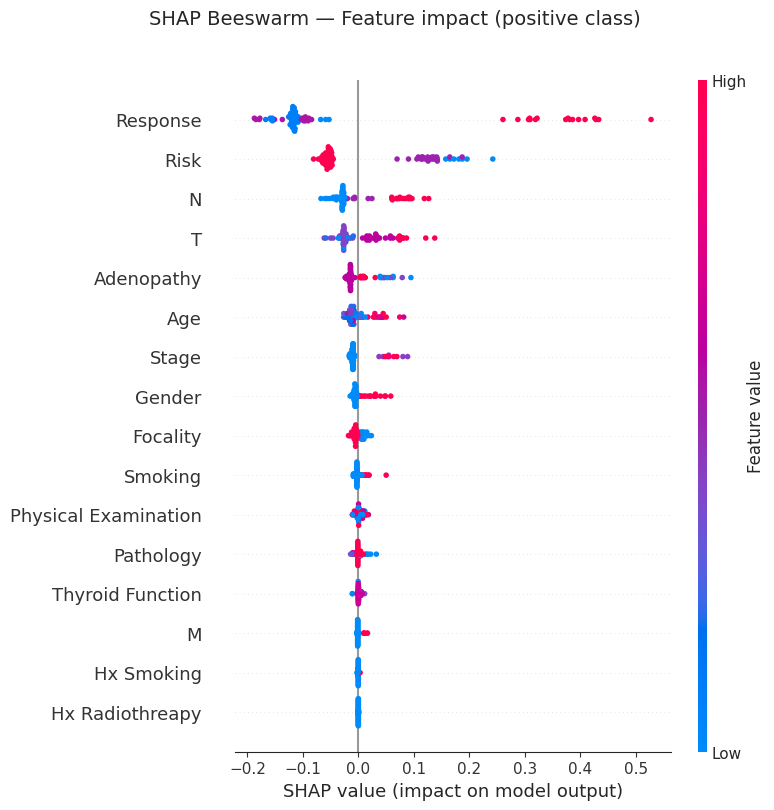

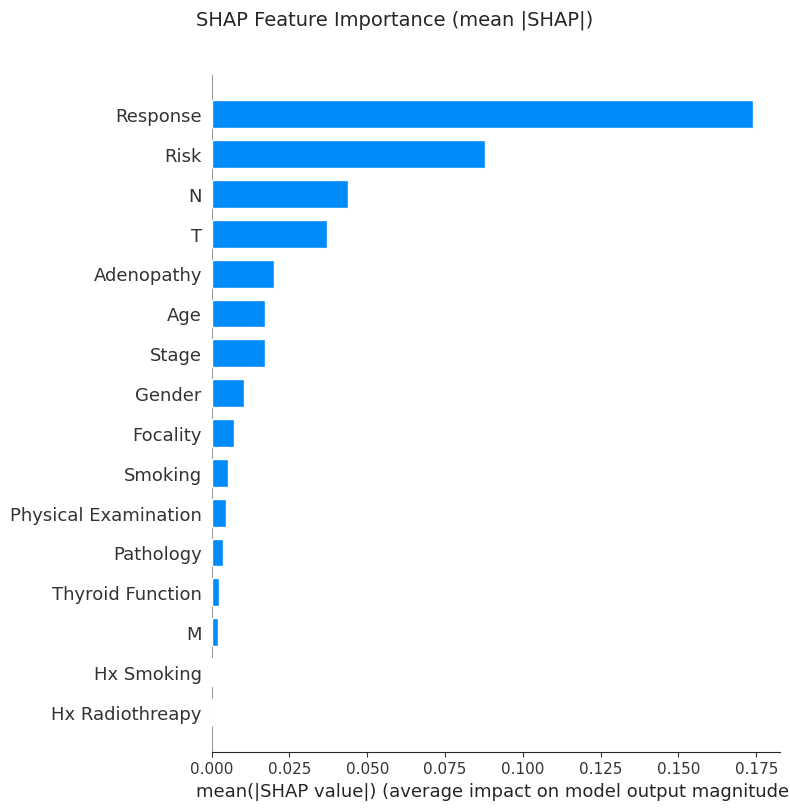

In [37]:
# Compact, robust SHAP summary plotting cell
import numpy as np, matplotlib.pyplot as plt, shap, pandas as pd

# Ensure model and X_test exist
try:
    best_rf_model
    X_test
except NameError:
    raise RuntimeError("Make sure `best_rf_model` and `X_test` are present in the notebook namespace.")

# Compute SHAP values (TreeExplainer for tree models)
explainer = shap.TreeExplainer(best_rf_model)
shap_values_raw = explainer.shap_values(X_test)

# Normalize shap_values into a 2D array (n_samples, n_features) for class=1 if binary
def to_2d(shv, X):
    """Return a 2D shap array (n_samples,n_features) appropriate for plotting."""
    # shap.Explanation object
    if hasattr(shv, "values"):
        arr = np.array(shv.values)
    else:
        arr = np.array(shv)
    # If list-like (per-class), prefer the positive class if present
    if isinstance(shv, (list, tuple)) and len(shv) >= 2:
        arr = np.array(shv[1])
    # If arr has extra trailing dim like (n_samples, n_features, k), collapse by picking last dim or mean
    if arr.ndim == 3:
        # try collapse by taking last axis slice (often per-class or per-output axis)
        arr = arr[:, :, -1]
    # final check
    if arr.ndim != 2:
        raise ValueError(f"Unable to coerce shap_values to 2D array. got shape {arr.shape}")
    if arr.shape[0] != X.shape[0] or arr.shape[1] != X.shape[1]:
        # helpful error
        raise ValueError(f"SHAP shape {arr.shape} does not match X_test shape {X.shape}. Check feature order/encoding.")
    return arr

shap_vals = to_2d(shap_values_raw, X_test)

# Plot beeswarm & bar with visible titles
plt.figure(figsize=(10,6))
shap.summary_plot(shap_vals, X_test, show=False)            # beeswarm
plt.gcf().suptitle("SHAP Beeswarm — Feature impact (positive class)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
shap.summary_plot(shap_vals, X_test, plot_type="bar", show=False)   # mean-abs bar
plt.gcf().suptitle("SHAP Feature Importance (mean |SHAP|)", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()
